## Naïve Bayes vs Other Classifiers
### Exploring Parametric and Non-Parametric Comparisons

In this notebook we will continue to explore on Naïve Bayes by comparing it to other common classification models.

**What we will do in this exercise:**
- Performance comparison of Naïve Bayes with Logistic Regression, Decision Tree, k-Nearest Neighbors (k-NN), and SVM
- Conceptual distinction: **Parametric vs Non-Parametric** models
- How assumptions, data requirements, and model flexibility differ

**Learning Objective:**
- Learn to compare Naïve Bayes within other classification models and introduce the idea of parametric vs non-parametric approaches.
- Run comparative notebook experiment: run NB, Logistic Regression, Decision Tree, and SVM on Spam dataset. Observe differences in assumptions, training time, interpretability, and accuracy.

**Let us get started now**

### Setup and Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

### Load the Spam Dataset

We will use the **Spam dataset** (continuous features, binary target).

In [2]:
df = pd.read_csv("/content/Spam.csv")
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Data Preparation

Let us prepare the dataset next into training and test samples and perform necessary transformations before feeding into the model.

In [3]:
X = df.drop(columns=['spam']).values
y = df['spam'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [5]:
# Scale features for models that are sensitive to feature magnitude
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
print('Dataset shape:', df.shape)
print('Train/Test split:', X_train.shape, X_test.shape)

Dataset shape: (4601, 58)
Train/Test split: (3220, 57) (1381, 57)


### Define and Train Models

We will train the following models and compare performance:
- Gaussian Naïve Bayes (**parametric**)
- Logistic Regression (**parametric**)
- Decision Tree (**non-parametric**)
- k-NN (**non-parametric**)
- SVM (linear kernel, **parametric-like** boundary but with flexible kernel option)

In [7]:
models = {
'Naive Bayes (Gaussian)': GaussianNB(),
'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
'Decision Tree': DecisionTreeClassifier(random_state=42),
'k-NN': KNeighborsClassifier(n_neighbors=5),
'SVM (Linear)': SVC(kernel='linear', random_state=42)
}

In [8]:
results = []

In [9]:
for name, model in models.items():
  start = time.time()
  if name in ['Naive Bayes (Gaussian)', 'Decision Tree']:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
  else:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
  end = time.time()
  acc = accuracy_score(y_test, y_pred)
  results.append((name, acc, end - start))
  print(f'--- {name} ---')
  print(f'Accuracy: {acc:.4f}, Training time: {end - start:.3f}s')
  print(classification_report(y_test, y_pred))

--- Naive Bayes (Gaussian) ---
Accuracy: 0.8240, Training time: 0.026s
              precision    recall  f1-score   support

           0       0.96      0.74      0.84       837
           1       0.70      0.95      0.81       544

    accuracy                           0.82      1381
   macro avg       0.83      0.85      0.82      1381
weighted avg       0.86      0.82      0.83      1381

--- Logistic Regression ---
Accuracy: 0.9283, Training time: 0.145s
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       837
           1       0.92      0.89      0.91       544

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381

--- Decision Tree ---
Accuracy: 0.8921, Training time: 0.189s
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       837
           1       0.85      0.88   

### Model Performance Analysis

Let us now analyse the accuracy and training time plots for all the models.

In [10]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Training Time (s)']).sort_values(by='Accuracy', ascending=False)
results_df.reset_index(drop=True, inplace=True)
print(results_df)

                    Model  Accuracy  Training Time (s)
0            SVM (Linear)  0.929037           1.491547
1     Logistic Regression  0.928313           0.145457
2                    k-NN  0.899348           0.244330
3           Decision Tree  0.892107           0.188613
4  Naive Bayes (Gaussian)  0.824041           0.026126


/tmp/ipython-input-487349880.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


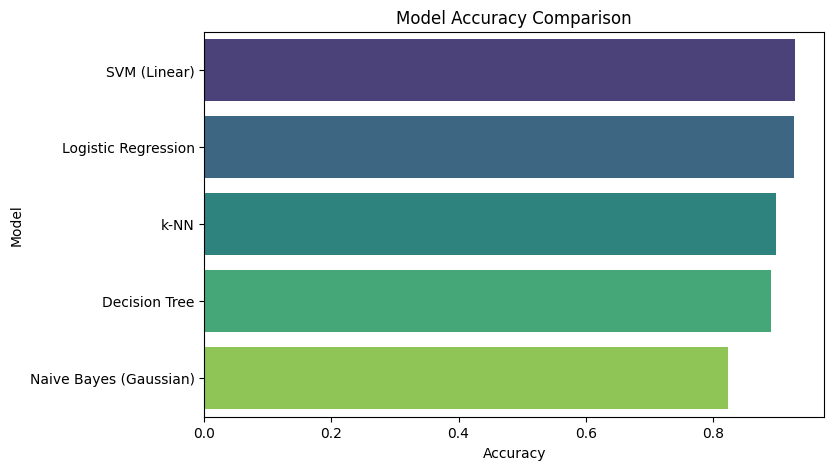

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.show()

SVM and Logistic Regression models performed better on this dataset, while Gaussian Naive Bayes demonstrated much lower performance.

/tmp/ipython-input-336896670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Training Time (s)', y='Model', data=results_df, palette='magma')


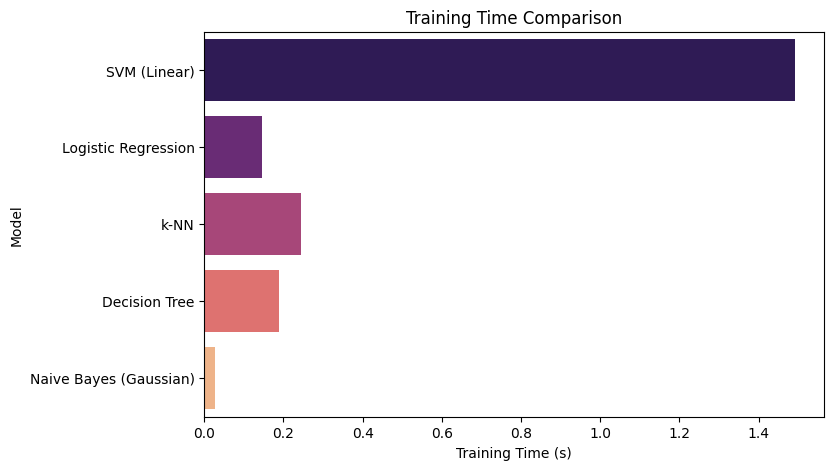

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x='Training Time (s)', y='Model', data=results_df, palette='magma')
plt.title('Training Time Comparison')
plt.show()

However, Naive Bayes has the lowest training time compared to the other models. But considering a balanace between accuracy and training time, logistic regression is the best option to go for in this scenario.

### Parametric Vs. Non-parametric Models

Let us understand some key distinction between parametric and non-parametric models.

- **Parametric Models:** Assume a specific functional form and estimate a fixed set of parameters (e.g., weights or means/variances). Training is typically fast and works well when assumptions hold.


- **Non-Parametric Models:** Do not assume a predefined form. They adapt to data shape and complexity but may require more data and computation.


| Model | Type | Parametric Nature | Main Assumption | Flexibility |
|--------|------|------------------|------------------|--------------|
| **Naïve Bayes** | Parametric | Fixed parameters (mean, variance per feature per class) | Feature independence + distribution shape | Low (rigid) |
| **Logistic Regression** | Parametric | Fixed number of parameters (weights) | Linear relationship between features & log-odds | Moderate |
| **Decision Tree** | Non-parametric | Grows with data complexity | No explicit distributional assumptions | High |
| **k-NN** | Non-parametric | No fixed parameters; uses all training samples | Similar samples → similar labels | High |
| **SVM** | Parametric (linear) / Non-parametric (RBF) | Fixed parameters for linear kernel; more flexible for RBF | Maximises class margin | Medium–High |




**In Summary**

**1. Accuracy vs Interpretability:**
Decision Trees and Logistic Regression are easier to interpret, while SVM and k-NN are more opaque.


**2. Training Time:**
Naïve Bayes and Logistic Regression train very quickly, while k-NN and SVM can be slower on large datasets.


**3. Model Assumptions:**
- Naïve Bayes assumes feature independence and normality.
- Logistic Regression assumes linear separability in transformed feature space.
- Decision Trees and k-NN make minimal assumptions: they are more flexible but can overfit.


**4. Parametric vs Non-Parametric Choice:**
Use **parametric models** when data fits known distributions and you value simplicity.
Use **non-parametric models** when relationships are complex or unknown and you have enough data.

### Conclusion

In this exercise, we compared Naïve Bayes with Logistic Regression, Decision Tree, k-NN, and SVM on the Spam dataset, demonstrating that no single model is universally best as each balances assumptions, speed, interpretability, and flexibility differently. Naïve Bayes and Logistic Regression, as parametric models, are fast, interpretable, and rely on specific assumptions, while Decision Tree and k-NN, as non-parametric models, are more flexible and assumption-light but prone to overfitting. Ultimately, model choice depends on the nature of the data, task complexity, and the level of interpretability required. Learners should now be able to explain what makes a model parametric or non-parametric and make informed decisions about which classification approach best suits different scenarios.